In [1]:
%matplotlib inline
from netCDF4 import Dataset
from pylab import *
import numpy as np
import glob
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
from spharm import Spharmt
from tqdm import tqdm
import sys

from matplotlib.ticker import AutoMinorLocator

cmap = sns.cubehelix_palette(light=1, as_cmap=True, reverse=True)
cmap = ListedColormap(sns.color_palette("coolwarm", 9).as_hex())
sns.reset_orig()

matplotlib.rcParams['lines.linewidth'] = 0.6

matplotlib.rcParams['axes.linewidth'] = 1
matplotlib.rcParams['font.size'] = 7
matplotlib.rcParams['legend.frameon'] = False

matplotlib.rcParams['figure.dpi'] = 150
matplotlib.rcParams['axes.facecolor'] = '#F8F8FF'
matplotlib.rcParams['axes.grid'] = True
matplotlib.rcParams['axes.axisbelow'] = True
matplotlib.rcParams['axes.labelsize'] = 7

matplotlib.rcParams['grid.linestyle'] = '-.'
matplotlib.rcParams['grid.linewidth'] = 0.4

matplotlib.rcParams['xtick.major.size'] = 5
matplotlib.rcParams['xtick.major.width'] = 1
matplotlib.rcParams['xtick.minor.size'] = 3
matplotlib.rcParams['xtick.minor.width'] = 0.7

matplotlib.rcParams['ytick.major.size'] = 5
matplotlib.rcParams['ytick.major.width'] = 1
matplotlib.rcParams['ytick.minor.size'] = 3
matplotlib.rcParams['ytick.minor.width'] = 0.7


In [2]:
nlons = 72
nlats = 36
grid = Spharmt(nlons,nlats,gridtype='regular',rsphere=3371e3)

tmpspec =  grid.grdtospec(np.zeros((nlats, nlons)), ntrunc=35)
print (tmpspec.size)

666


In [30]:
if glob.glob('./../model_run/dustL45_t35p0.0125/*pert.npy'):
    pert = np.load(glob.glob('./../model_run/dustL45_t35p0.0125/*pert.npy')[0])
#     print (pert)
    generatePert = False
else:
    generatePert = True

for j, filename in enumerate(sorted(glob.glob('./../model_run/dustL45_t35p0.015/wrfrst_d01*'))):
    if('_0036' in filename):# | ('_0037' in j) | ('_0038' in j):
        filedir = filename
        if '_pert' in filedir:
            pass
        else:
            print (filedir)
            data = Dataset(filedir, 'r+')
            
#             t2 = data.variables['T_2'][:][0,0]
#             t1 = data.variables['T_1'][:][0,0]
            
            if not generatePert:
                print('Looking at pert')
            else:
                print('Generating pert')

                size = int(665)
                pert = np.zeros((size))
                for i, num in enumerate(pert):
                    tmp = np.random.uniform(-100,100)
                    pert[i] = tmp
                np.save(j.replace('/wrfrst_d01', '/wrfrst_d01')+'_pert.npy', pert)
        
            tmp = np.zeros((52, 36, 72))
            tmp2 = np.zeros((52, 36, 72))
            for i in np.arange(52):
                tmpspec =  grid.grdtospec(data.variables['T_2'][:][0,i], ntrunc=35)
                tmpspec[1:] = tmpspec[1:]*(1+0.015*pert)
                tmp[i] = grid.spectogrd(tmpspec)

                tmpspec =  grid.grdtospec(data.variables['T_1'][:][0,i], ntrunc=35)
                tmpspec[1:] = tmpspec[1:]*(1+0.015*pert)
                tmp2[i] = grid.spectogrd(tmpspec)

            data.variables['T_2'][:] = tmp[np.newaxis,:,:,:]
            data.variables['T_1'][:] = tmp2[np.newaxis,:,:,:]

            data.close()

./../model_run/dustL45_t35p0.015/wrfrst_d01_0036-00086_00_00_00
Looking at pert
./../model_run/dustL45_t35p0.015/wrfrst_d01_0036-00186_00_00_00
Looking at pert
./../model_run/dustL45_t35p0.015/wrfrst_d01_0036-00286_00_00_00
Looking at pert
./../model_run/dustL45_t35p0.015/wrfrst_d01_0036-00386_00_00_00
Looking at pert
./../model_run/dustL45_t35p0.015/wrfrst_d01_0036-00486_00_00_00
Looking at pert
./../model_run/dustL45_t35p0.015/wrfrst_d01_0036-00586_00_00_00
Looking at pert


[[ 53.22460938  53.20259094  53.1967926  ...,  53.38560486  53.31646729
   53.26264954]
 [ 46.60090637  47.39968872  48.19013977 ...,  44.26039124  45.0138855
   45.80096436]
 [ 36.48971558  36.91003418  37.48451233 ...,  34.28793335  35.30825806
   36.01449585]
 ..., 
 [ 70.36312866  70.89333344  71.49953461 ...,  69.04021454  69.48018646
   69.9018631 ]
 [ 70.94837189  71.50021362  72.11721802 ...,  69.57226562  69.99041748
   70.44805145]
 [ 77.3287735   77.49521637  77.64325714 ...,  76.7322998   76.94585419
   77.14517975]]


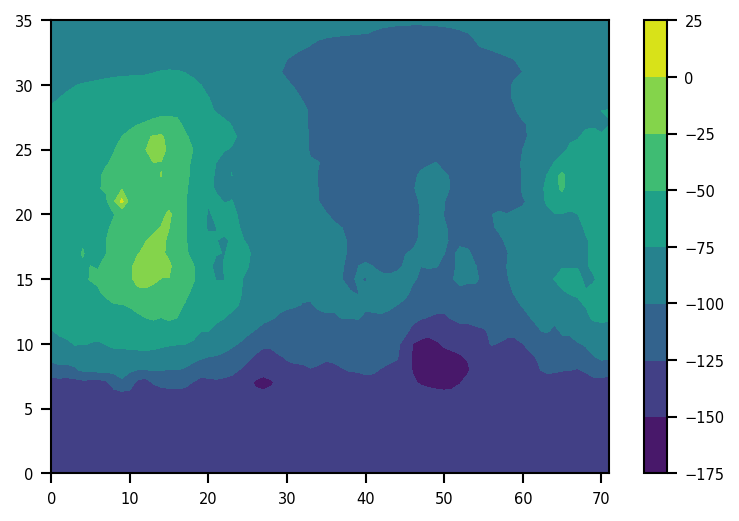

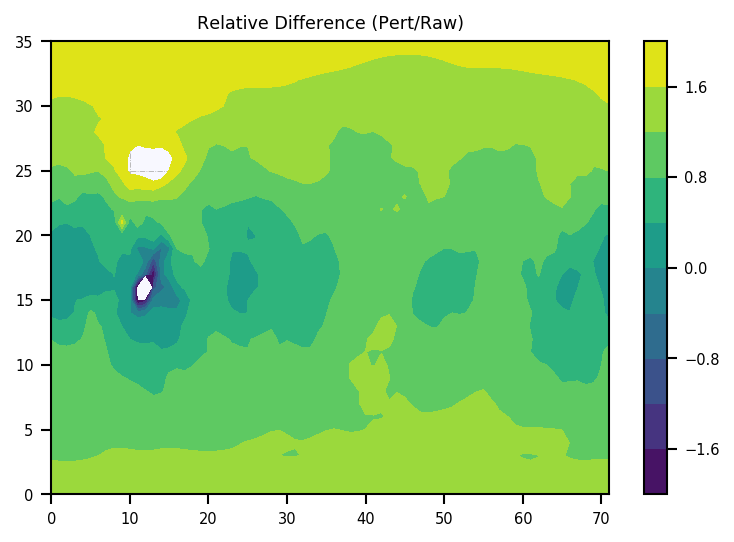

In [71]:
# print (filedir)

data = Dataset('./../model_run/dustL45/wrfrst_d01_0036-00286_00_00_00', 'a')
t2 = data.variables['T_2'][:][0,0]
data.close()

data = Dataset('./../model_run/dustL45_t35p/wrfrst_d01_0036-00286_00_00_00', 'a')
t22 = data.variables['T_2'][:][0,0]
print (t2-t22)
data.close()

figure()
contourf(t2)
colorbar()

figure()
contourf(t22/t2, np.linspace(-2,2,11))
title('Relative Difference (Pert/Raw)')
colorbar()
# contourf(t1)


[[ 58.33033752  58.3067627   58.30438232 ...,  58.55914307  58.4630127
   58.38365173]
 [ 50.54684448  50.41722107  50.27056885 ...,  50.84432983  50.75111389
   50.65653992]
 [ 36.55506897  35.76971436  35.26016235 ...,  38.48497009  38.09715271
   37.40182495]
 ..., 
 [ 77.90314484  79.02949524  80.43652344 ...,  76.26937866  76.57138062
   77.09100342]
 [ 83.18405151  83.11129761  83.03726196 ...,  83.21986389  83.24794006
   83.23422241]
 [ 84.8038559   84.86693573  84.93559265 ...,  84.65260315  84.69628143
   84.74682617]]


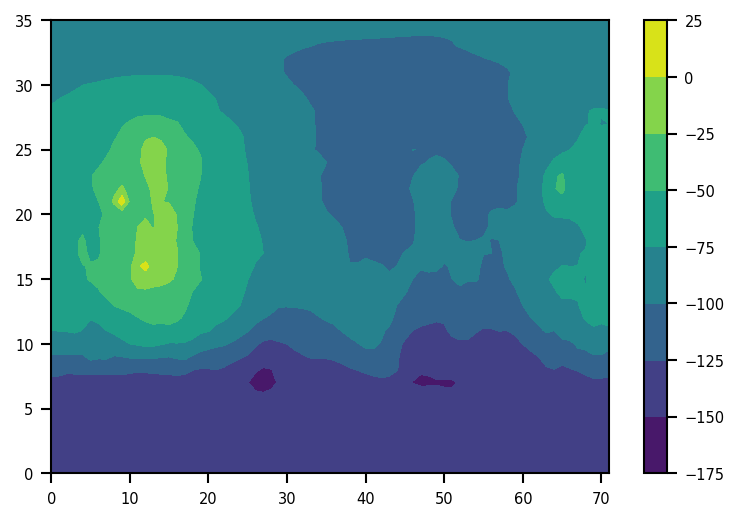

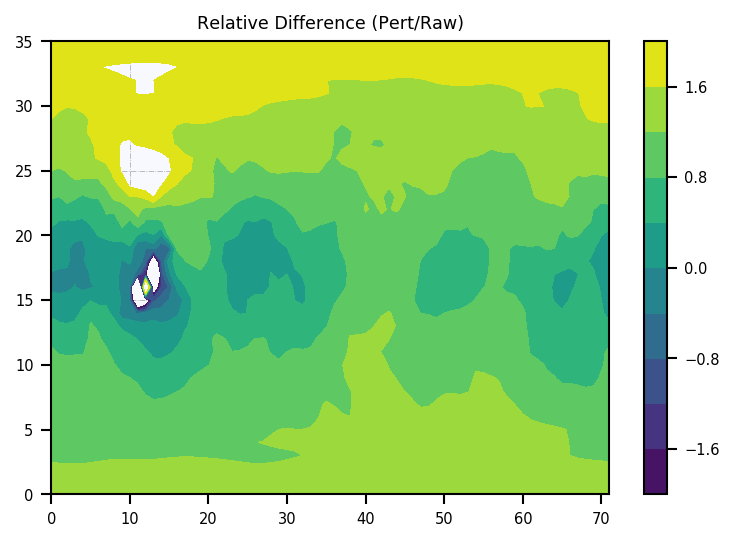

In [70]:
# print (filedir)

data = Dataset('./../model_run/wetL60/wrfrst_d01_0036-00286_00_00_00', 'a')
t2 = data.variables['T_2'][:][0,0]
data.close()

data = Dataset('./../model_run/wetL60_t35p/wrfrst_d01_0036-00286_00_00_00', 'a')
t22 = data.variables['T_2'][:][0,0]
print (t2-t22)
data.close()

figure()
contourf(t2)
colorbar()

figure()
contourf(t22/t2, np.linspace(-2,2,11))
title('Relative Difference (Pert/Raw)')
colorbar()
# contourf(t1)
